---------------

**If any part of this notebook is used in your research, please cite with the reference found in** **[README.md](https://github.com/pysal/spaghetti#bibtex-citation).**


----------------
# Quickstart
## Creating and visualizing a `spaghetti.Network` object

**Author: James D. Gaboardi** **<jgaboardi@gmail.com>**

**This notebook provides an explanation of network creation followed by an emprical example for:**

1. Instantiating a network
2. Allocating observations to a network (snapping points)
3. Visualizing the original and network-snapped locations with `geopandas` and `matplotlib`

In [1]:
%config InlineBackend.figure_format = "retina"

In [2]:
%load_ext watermark
%watermark

Last updated: 2021-06-28T19:34:00.646060-04:00

Python implementation: CPython
Python version       : 3.9.4
IPython version      : 7.24.1

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 20.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [3]:
import geopandas
import libpysal
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib_scalebar
from matplotlib_scalebar.scalebar import ScaleBar
import shapely
import spaghetti
%matplotlib inline
%watermark -w
%watermark -iv

Watermark: 2.2.0

shapely            : 1.7.1
geopandas          : 0.9.0
matplotlib_scalebar: 0.7.2
matplotlib         : 3.4.2
spaghetti          : 1.6.2
json               : 2.0.9
libpysal           : 4.4.0



--------------------------------
## The basics of `spaghetti`
### 1. Creating a network instance

Spatial data science techniques can support many types of statistical analyses of spatial networks themselves, and of events that happen along spatial networks in our daily lives, i.e. locations of trees along foot paths, biking accidents along street networks or locations of coffeeshops along streets. `spaghetti` provides computational tools to support statistical analysis of such events along many different types of networks. Within `spaghetti` network objects can be created from [a variety of objects](https://pysal.org/spaghetti/generated/spaghetti.Network.html#spaghetti-network), the most common being shapefiles (read in as file paths) and `geopandas.GeoDataFrame` objects. However, a network could also be created from `libpysal` geometries, as demonstrated in the [connected components tutorial](https://pysal.org/spaghetti/notebooks/connected-components.html#1.-Instantiate-a-network-from-two-collections-of-libpysal.cg.Chain-objects) or a simply as follows:

```python
from libpysal.cg import Point, Chain
import spaghetti
# create the network
ntw = spaghetti.Network(in_data=Chain([Point([1, 1]), Point([2, 1])]))
```

This will create a single-segment network, which is simply one single line. Although the chances of a single-segment network existing in reality are rare, it is useful for demonstration purposes.

The stucture and characterstics of the networks, can be quantitatively described with `spaghetti` and are topics of research in many areas. However, networks are also utilized as the study space, containing observations or events of interest, in many applications. In these cases the actual objects of interest that will be analysed in the geographic space a network provides, are "network-based events."


### 2. Snapping events (points) to a network

First, point objects, representing our network-based events, must be snapped to the network for meaningful spatial analysis to be done or models to be constructed. As with `spaghetti.Network` objects, `spaghetti.PointPattern` objects can be [created from](https://pysal.org/spaghetti/generated/spaghetti.PointPattern.html#spaghetti.PointPattern) shapefiles and `geopandas.GeoDataFrame` objects. Furthermore, `spaghetti` can also simply handle a single `libpysal.cg.Point `object. Considering the single-segment network above:

```python
# create the point and snap it to the network
ntw.snapobservations(Point([1.5, 1.1]), "point")
```

At this point the point is associated with the network and, as such, is defined in network space.


### 3. Visualizating the data

Visualization is a cornerstone in communicating scientific data. Within the context of `spaghetti` elements of the network must be [extracted](https://pysal.org/spaghetti/generated/spaghetti.element_as_gdf.html#spaghetti.element_as_gdf) as `geopandas.GeoDataFrame` objects prior to being visualized with `matplotlib`. This is shown in the following block of code, along with network creation and point snapping.

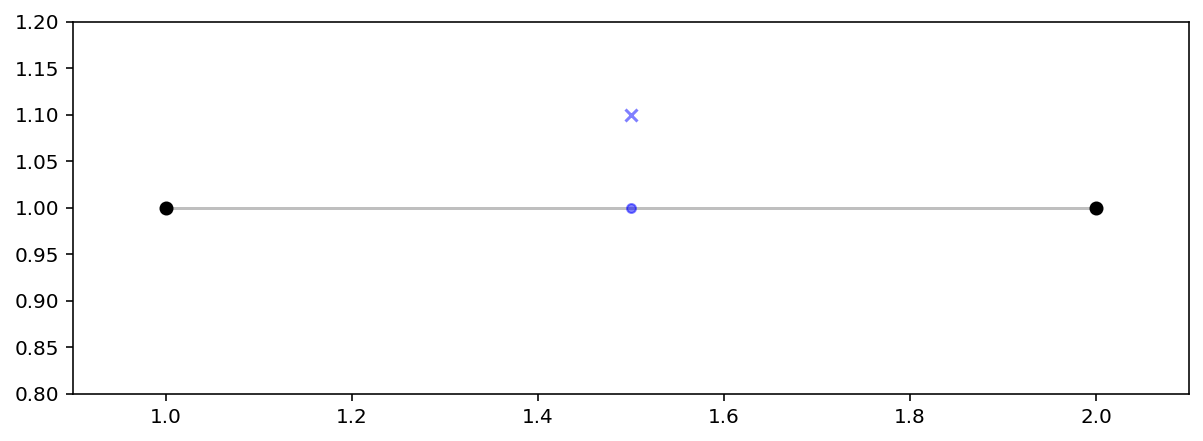

In [4]:
from libpysal.cg import Point, Chain
import spaghetti

# create the network
ntw = spaghetti.Network(in_data=Chain([Point([1, 1]), Point([2, 1])]))

# create the point and snap it to the network
ntw.snapobservations(Point([1.5, 1.1]), "point")

# network nodes and edges
vertices_df, arcs_df = spaghetti.element_as_gdf(ntw, vertices=True, arcs=True)

# true and snapped location of points
point_df = spaghetti.element_as_gdf(ntw, pp_name="point", snapped=False)
snapped_point_df = spaghetti.element_as_gdf(ntw, pp_name="point", snapped=True)

# plot the network and point
base = arcs_df.plot(figsize=(10,10), color="k", alpha=0.25, zorder=0)
vertices_df.plot(ax=base, color="k", alpha=1)
kwargs = {"ax":base, "alpha":0.5, "zorder":1}
point_df.plot(color="b", marker="x", **kwargs)
snapped_point_df.plot(color="b", markersize=20, **kwargs)
plt.xlim(.9,2.1); plt.ylim(.8,1.2);

Network creation, observation snapping, and visualization are further reviewed below for an example with empirical datasets available `libpysal`.


------------------------------
## Empirical Example

In the following we will walk through an empirical example, visually comparing school locations with a network to crimes committed within the same network.

### 1. Instantiating a `spaghetti.Network` object
#### Instantiate the network from a `.shp` file

In [5]:
ntw = spaghetti.Network(in_data=libpysal.examples.get_path("streets.shp"))

------------------------------
### 2. Allocating observations to a network:
#### Schools without attributes

In [6]:
ntw.snapobservations(
    libpysal.examples.get_path("schools.shp"), "schools", attribute=False
)

#### True vs. snapped school coordinates comparison:  `spaghetti.Network` attributes

In [7]:
print("observation 1\ntrue coords:\t%s\nsnapped coords:\t%s" % (
    ntw.pointpatterns["schools"].points[0]["coordinates"],
    ntw.pointpatterns["schools"].snapped_coordinates[0]
))

observation 1
true coords:	(727082.0462136, 879863.260705768)
snapped coords:	(727287.6644417326, 879867.3863186113)


#### Crimes with attributes

In [8]:
ntw.snapobservations(
    libpysal.examples.get_path("crimes.shp"), "crimes", attribute=True
)

#### True vs. snapped crime coordinates comparison: `spaghetti.Network` attributes

In [9]:
print("observation 1\ntrue coords:\t%s\nsnapped coords:\t%s" % (
    ntw.pointpatterns["crimes"].points[0]["coordinates"],
    ntw.pointpatterns["crimes"].snapped_coordinates[0]
))

observation 1
true coords:	(727913.0000000029, 875720.9999999977)
snapped coords:	(727919.2473619275, 875942.4986759046)


------------------------------
### 3. Visualizing original and snapped locations
#### True and snapped school locations

In [10]:
true_schools_df = spaghetti.element_as_gdf(
    ntw, pp_name="schools", snapped=False
)
snapped_schools_df = spaghetti.element_as_gdf(
    ntw, pp_name="schools", snapped=True
)

#### True vs. snapped school coordinates comparison: `geopandas.GeoDataFrame`

In [11]:
# Compare true point coordinates & snapped point coordinates
print("observation 1\ntrue coords:\t%s\nsnapped coords:\t%s" % (
    true_schools_df.geometry[0].coords[:][0],
    snapped_schools_df.geometry[0].coords[:][0]
))

observation 1
true coords:	(727082.0462136, 879863.260705768)
snapped coords:	(727287.6644417326, 879867.3863186113)


#### True and snapped crime locations

In [12]:
true_crimes_df = spaghetti.element_as_gdf(
    ntw, pp_name="crimes", snapped=False
)
snapped_crimes_df = spaghetti.element_as_gdf(
    ntw, pp_name="crimes", snapped=True
)

#### True vs. snapped crime coordinates comparison: `geopandas.GeoDataFrame`

In [13]:
print("observation 1\ntrue coords:\t%s\nsnapped coords:\t%s" % (
    true_crimes_df.geometry[0].coords[:][0],
    snapped_crimes_df.geometry[0].coords[:][0]
))

observation 1
true coords:	(727913.0000000029, 875720.9999999977)
snapped coords:	(727919.2473619275, 875942.4986759046)


#### Create `geopandas.GeoDataFrame` objects of the vertices and arcs

In [14]:
# network nodes and edges
vertices_df, arcs_df = spaghetti.element_as_gdf(ntw, vertices=True, arcs=True)

#### Create legend patches for the `matplotlib` plot

In [15]:
# create legend arguments and keyword arguments for matplotlib
args = [], []
kwargs = {"c":"k"}

# set arcs legend entry
arcs = mlines.Line2D(*args, **kwargs, label="Network Arcs", alpha=0.5)

# update keyword arguments for matplotlib
kwargs.update({"lw":0})

# set vertices legend entry
vertices = mlines.Line2D(
    *args, **kwargs, ms=2.5, marker="o", label="Network Vertices"
)

In [16]:
# set true school locations legend entry
tschools = mlines.Line2D(
    *args, **kwargs, ms=25, marker="X", label="School Locations"
)
# set network-snapped school locations legend entry
sschools = mlines.Line2D(
    *args, **kwargs, ms=12, marker="o", label="Snapped Schools"
)

In [17]:
# update keyword arguments for matplotlib
kwargs.update({"c":"r", "alpha":0.75})

# set true crimes locations legend entry
tcrimes = mlines.Line2D(
    *args, **kwargs, ms=7, marker="x", label="Crime Locations"
)
# set network-snapped crimes locations legend entry
scrimes = mlines.Line2D(
    *args, **kwargs, ms=3, marker="o", label="Snapped Crimes"
)

In [18]:
# combine all legend patches
patches = [arcs, vertices, tschools, sschools, tcrimes, scrimes]

#### Plotting `geopandas.GeoDataFrame` objects

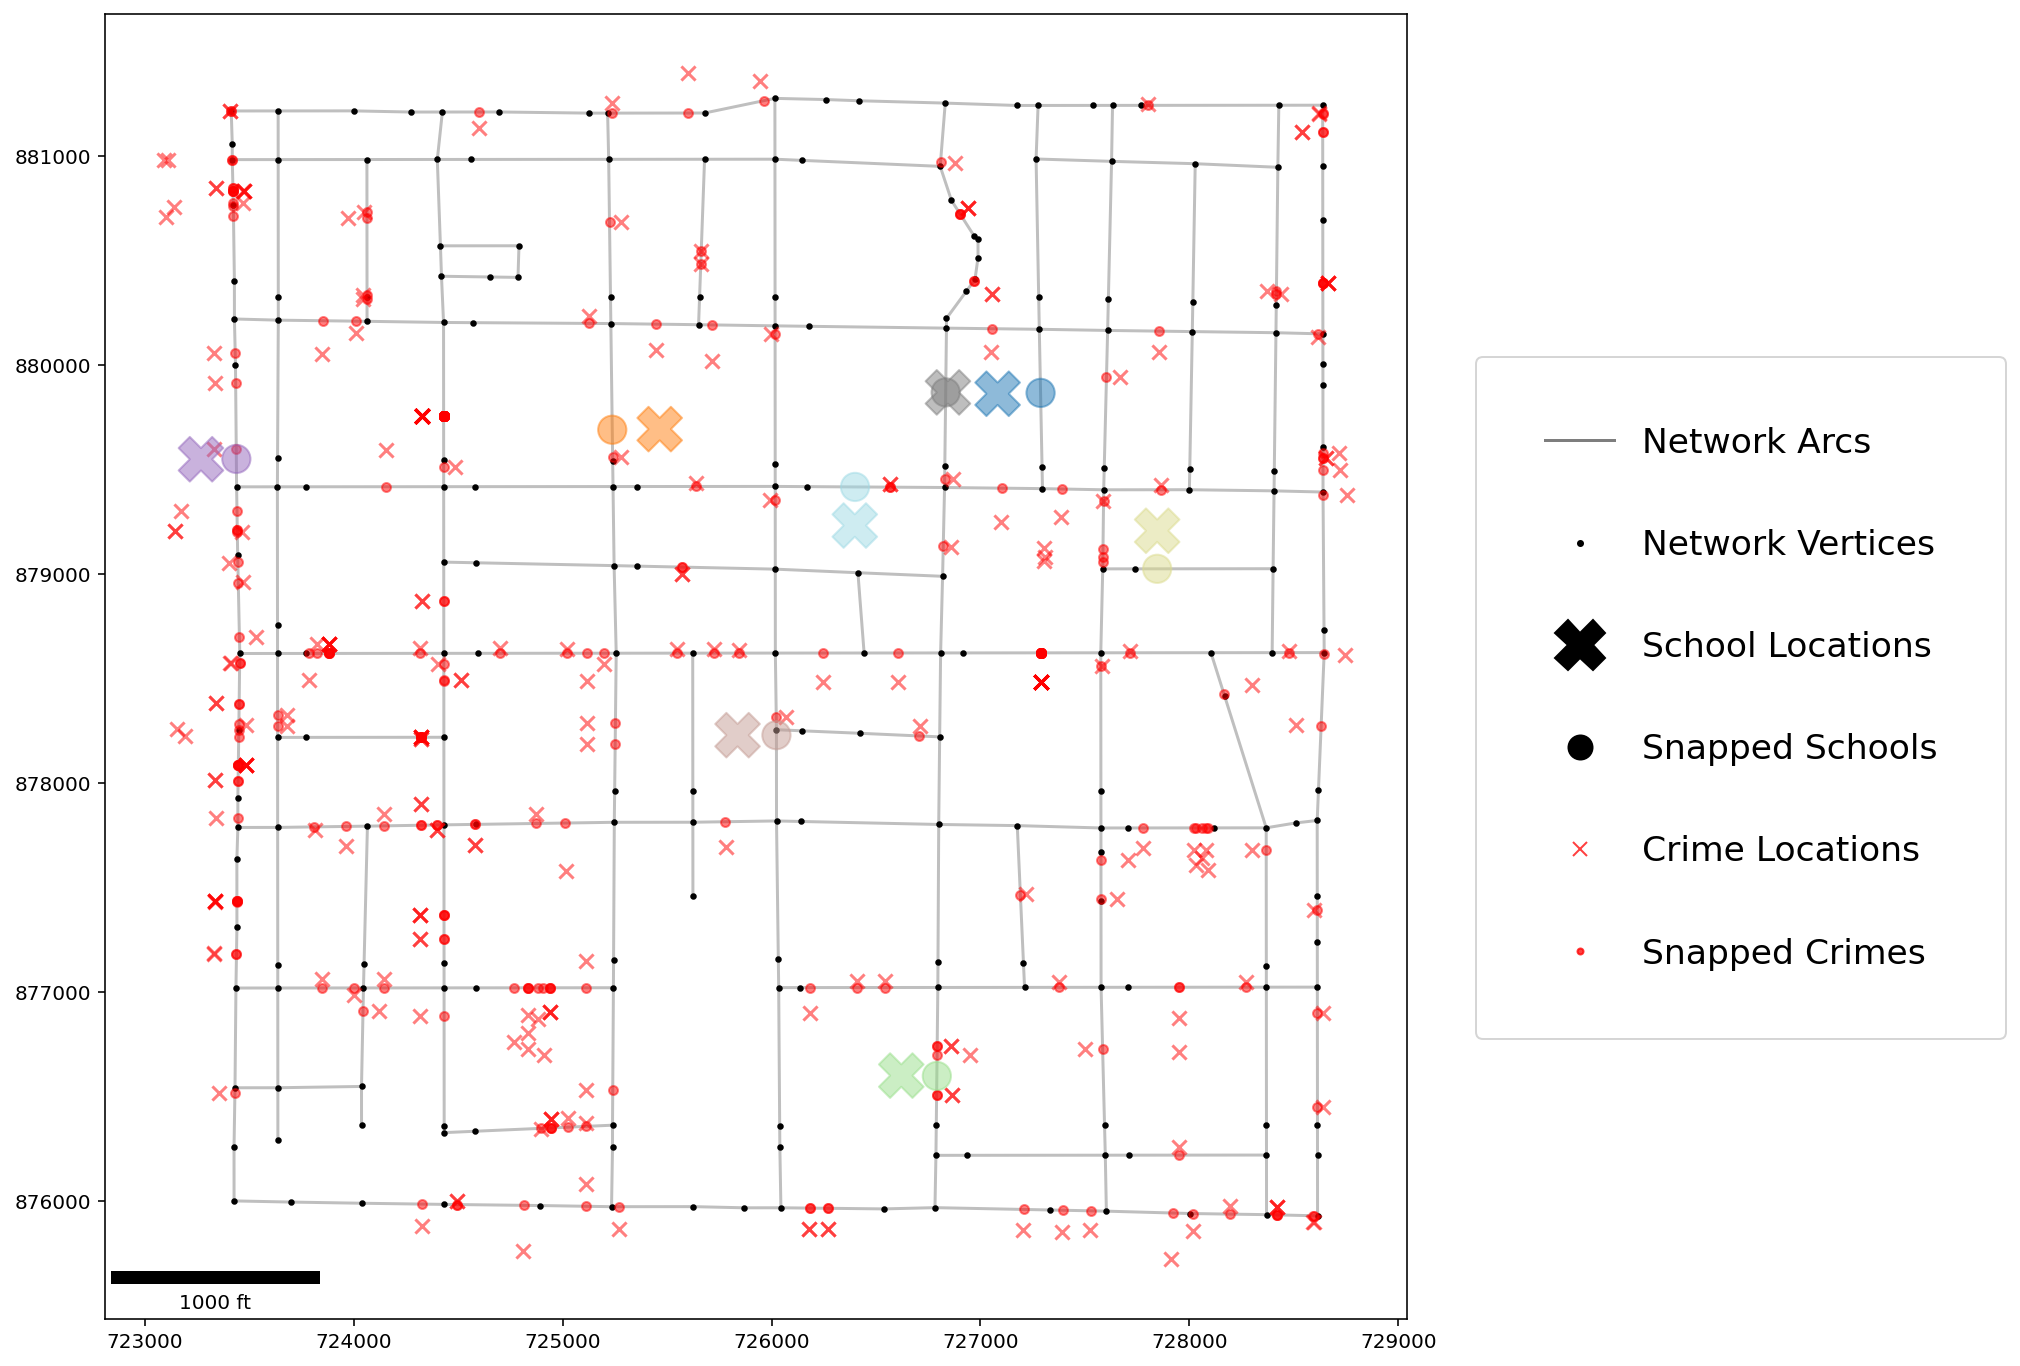

In [19]:
# set the streets as the plot base
base = arcs_df.plot(color="k", alpha=0.25, figsize=(12, 12), zorder=0)

# create vertices keyword arguments for matplotlib
kwargs = {"ax":base}
vertices_df.plot(color="k", markersize=5, alpha=1, **kwargs)

# update crime keyword arguments for matplotlib
kwargs.update({"alpha":0.5, "zorder":1})
true_crimes_df.plot(color="r", marker="x", markersize=50, **kwargs)
snapped_crimes_df.plot(color="r", markersize=20, **kwargs)

# update schools keyword arguments for matplotlib
kwargs.update({"cmap":"tab20", "column":"id", "zorder":2})
true_schools_df.plot(marker="X", markersize=500, **kwargs)
snapped_schools_df.plot(markersize=200, **kwargs)

# add scale bar
kw = {"units":"ft", "dimension":"imperial-length", "fixed_value":1000}
base.add_artist(ScaleBar(1, location="lower left", box_alpha=.75, **kw))

# add legend
plt.legend(
    handles=patches,
    fancybox=True,
    framealpha=0.8,
    scatterpoints=1,
    fontsize="xx-large",
    bbox_to_anchor=(1.04, 0.75),
    borderpad=2.,
    labelspacing=2.
);

-----------